In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
pd.set_option('display.max_columns', None)
path = '../../dados/experimentos/chess_games.csv'
df = pd.read_csv(path)
df.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...


In [10]:
# Drop null values in WhiteRatingDiff and BlackRatingDiff
df = df.dropna()


# Transform UTCDate into Year, Month and Day
# Will it be useful with a dataset that only has the year of 2016? Maybe this could be useful to analyse player information over time
df[['Year', 'Month', 'Day']] = df['UTCDate'].str.split('.', expand=True)
df = df.drop('UTCDate', axis=1)

# Transform UTCTime into hour, minute and second
df[['Hour', 'Minute', 'Second']] = df['UTCTime'].str.split(':', expand=True)

# Transform Result into WhiteWon and BlackWon
df['WhiteWon'] = df['Result'].apply(lambda result: 1 if result == '1-0' else (0.5 if result == '1/2-1/2' else 0))
df['BlackWon'] = df['Result'].apply(lambda result: 1 if result == '0-1' else (0.5 if result == '1/2-1/2' else 0))
df = df.drop('Result', axis=1)

# Transform TimeControl into Time and Increment
df = df[df['TimeControl'] != '-']
df[['Time', 'Increment']] = df['TimeControl'].str.split('+', expand=True)
df = df.drop('TimeControl', axis=1)

df['RatingDiff'] = df['WhiteElo'] - df['BlackElo']
df['RatingAvg'] = (df['WhiteElo'] + df['BlackElo']) / 2

df.head()

,Event,White,Black,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,Termination,AN,Year,Month,Day,Hour,Minute,Second,WhiteWon,BlackWon,Time,Increment,RatingDiff,RatingAvg
0,Classical,eisaaaa,HAMID449,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,2016,06,30,22,00,01,1.0,0.0,300,5,5,1898.5
1,Blitz,go4jas,Sergei1973,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,2016,06,30,22,00,01,0.0,1.0,300,0,14,1634.0
2,Blitz tournament,Evangelistaizac,kafune,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,2016,06,30,22,00,02,1.0,0.0,180,0,-41,1667.5
4,Blitz tournament,kyoday,BrettDale,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,2016,06,30,22,00,02,0.0,1.0,180,0,45,1922.5
5,Blitz tournament,lucaseixasouza,diguim,22:00:02,1773,1809,-10.0,10.0,C27,Vienna Game,Normal,1. e4 e5 2. Nc3 d6 3. Nf3 h6 4. Bc4 c6 5. b3 Q...,2016,06,30,22,00,02,0.0,1.0,180,0,-36,1791.0


In [10]:
print(f'{df.WhiteElo.describe()}\n')
print(f'{df.BlackElo.describe()}\n')
print(f'{df.RatingDiff.describe()}\n')
print(f'{df.RatingAvg.describe()}\n')
print(f'{df.WhiteRatingDiff.describe()}\n')
print(f'{df.BlackRatingDiff.describe()}\n')
print(f'{df.RatingDiff.describe()}\n')
print(f'{df.Opening.value_counts()[:10]}')

count    6.229305e+06
mean     1.742271e+03
std      2.657806e+02
min      7.370000e+02
25%      1.559000e+03
50%      1.741000e+03
75%      1.919000e+03
max      3.110000e+03
Name: WhiteElo, dtype: float64

count    6.229305e+06
mean     1.740701e+03
std      2.669600e+02
min      7.280000e+02
25%      1.557000e+03
50%      1.739000e+03
75%      1.919000e+03
max      3.108000e+03
Name: BlackElo, dtype: float64

count    6.229305e+06
mean     1.570676e+00
std      2.024801e+02
min     -1.691000e+03
25%     -1.040000e+02
50%      1.000000e+00
75%      1.070000e+02
max      1.702000e+03
Name: RatingDiff, dtype: float64

count    6.229305e+06
mean     1.741486e+03
std      2.463817e+02
min      7.955000e+02
25%      1.571000e+03
50%      1.738500e+03
75%      1.905000e+03
max      2.851500e+03
Name: RatingAvg, dtype: float64

count    6.229305e+06
mean     5.798087e-01
std      2.246445e+01
min     -5.950000e+02
25%     -9.000000e+00
50%      1.000000e+00
75%      1.000000e+01
max      6.

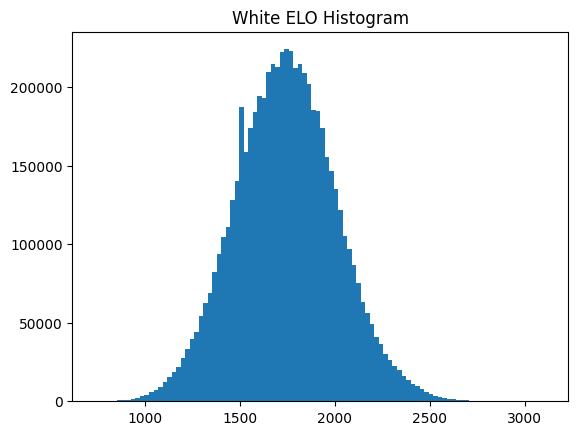

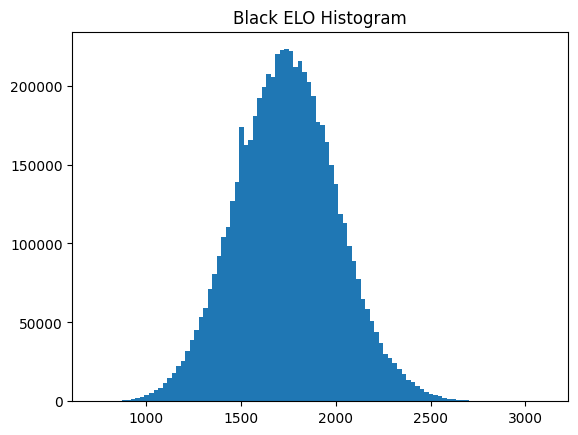

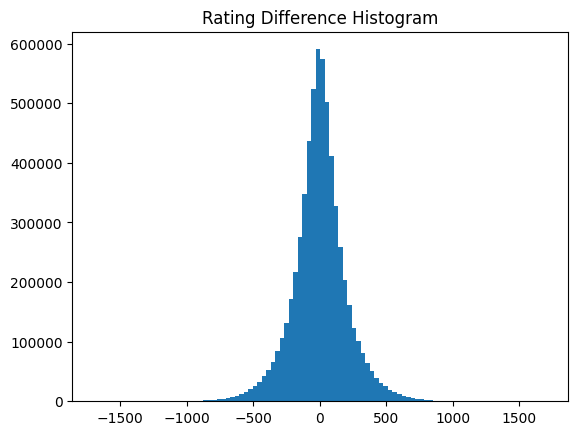

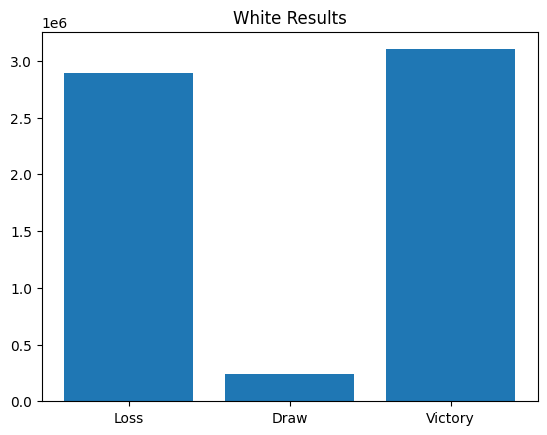

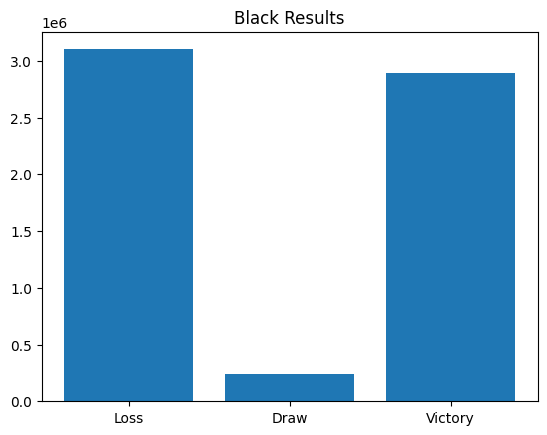

In [5]:
plt.hist(df['WhiteElo'],bins = 100)
plt.title('White ELO Histogram')
plt.show()

plt.hist(df['BlackElo'],bins = 100)
plt.title('Black ELO Histogram')
plt.show()

plt.hist(df['RatingDiff'],bins = 100)
plt.title('Rating Difference Histogram')
plt.show()

plt.bar(['Loss', 'Draw', 'Victory'], df['WhiteWon'].value_counts().sort_index())
plt.title('White Results')
plt.show()

plt.bar(['Loss', 'Draw', 'Victory'], df['BlackWon'].value_counts().sort_index())
plt.title('Black Results')
plt.show()


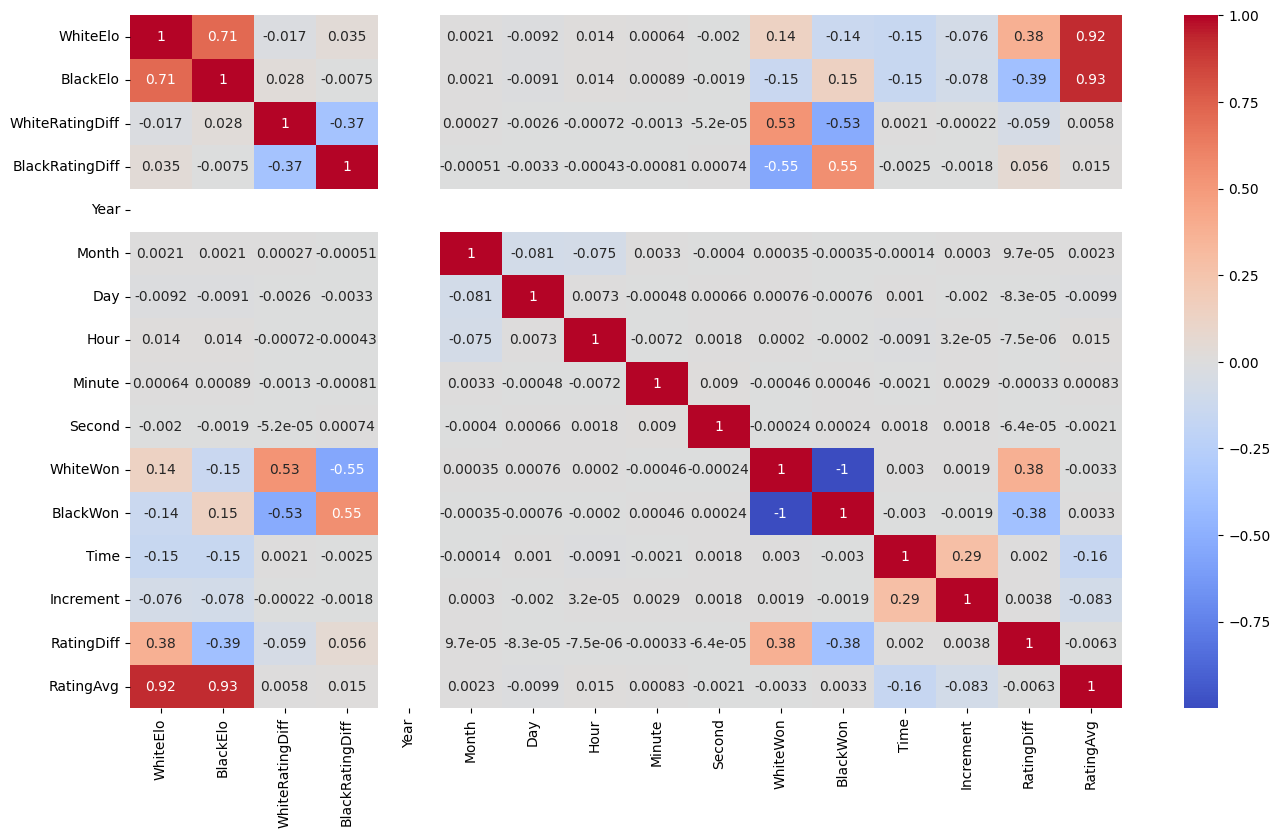

In [6]:
numerical_df = df[['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'Year', 'Month', 'Day', 'Hour', 
                   'Minute', 'Second', 'WhiteWon', 'BlackWon', 'Time', 'Increment', 'RatingDiff', 'RatingAvg']]
plt.figure(figsize=(16, 9))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()


C:\Users\Eduardo Eugênio\AppData\Local\Temp\ipykernel_25076\2424501462.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  opening_counts = df.groupby(['RatingRange', 'Opening']).size().reset_index(name='Count')
C:\Users\Eduardo Eugênio\AppData\Local\Temp\ipykernel_25076\2424501462.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_openings = opening_counts.groupby('RatingRange').apply(
C:\Users\Eduardo Eugênio\AppData\Local\Temp\ipykernel_25076\2424501462.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the 

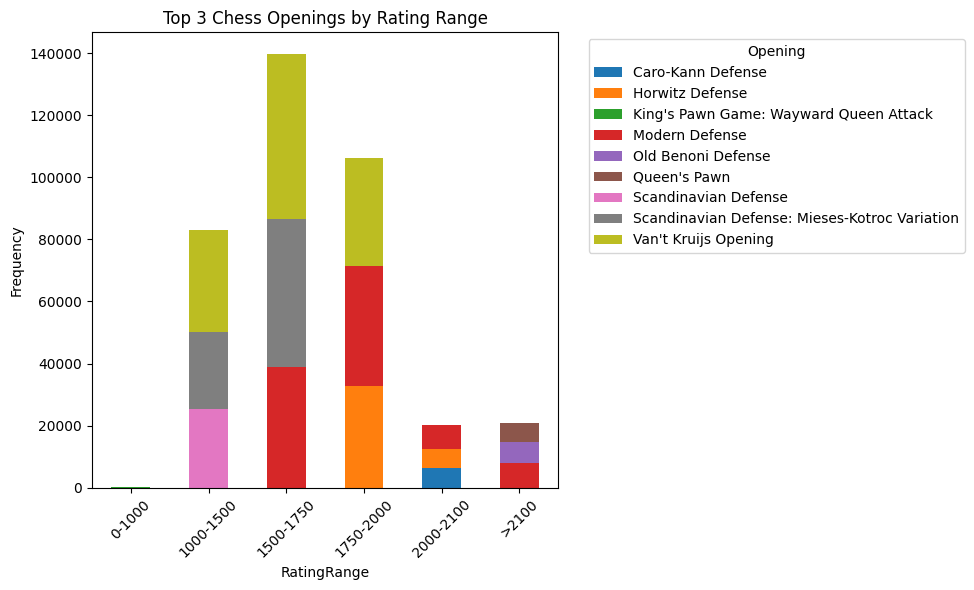

In [7]:
bins = [0, 1000, 1500, 1750, 2000, 2100, float('inf')]
labels = ['0-1000', '1000-1500', '1500-1750', '1750-2000','2000-2100', '>2100']
df['RatingRange'] = pd.cut(df['RatingAvg'], bins=bins, labels=labels)
opening_counts = df.groupby(['RatingRange', 'Opening']).size().reset_index(name='Count')

top_openings = opening_counts.groupby('RatingRange').apply(
    lambda x: x.nlargest(3, 'Count')
).reset_index(drop=True)

pivot_df = top_openings.pivot_table(index='RatingRange', columns='Opening', values='Count', fill_value=0)

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.ylabel('Frequency')
plt.title('Top 3 Chess Openings by Rating Range')
plt.xticks(rotation=45)
plt.legend(title='Opening', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()